# Walmart Business Case Study

#####

## 1. Defining Problem Statement and Analyzing Basic Metrics

### 1.1 Defining Problem Statement 

##### The management team at Walmart Inc. wants to analyze customer purchase behavior, particularly the purchase amount, against various factors including gender, age, marital status, etc., to make informed business decisions. Their aim is to understand if there are differences in spending habits among different demographics. Specifically, they want to understand if there are differences in spending habits between male and female customers, and how factors like age and marital status affect spending.


### 1.2 Analyzing Basic Metrics

In [7]:
# Importing required Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
# Load the dataset
df = pd.read_csv("walmart_data.csv")

In [9]:
# Data types of all the attributes
print("\nData Types of Columns:")
print(df.dtypes)


Data Types of Columns:
User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object


In [10]:
# Observations on shape of data
print("Shape of the Dataset:")
print(df.shape)

Shape of the Dataset:
(550068, 10)


In [11]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


In [12]:
# Convert categorical attributes to 'category' if required
cat_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [13]:
df.dtypes

User_ID                          int64
Product_ID                      object
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object

In [14]:
# Display statistical summary
print("\nStatistical summary of numerical attributes:")
print(df.describe())


Statistical summary of numerical attributes:
            User_ID       Purchase
count  5.500680e+05  550068.000000
mean   1.003029e+06    9263.968713
std    1.727592e+03    5023.065394
min    1.000001e+06      12.000000
25%    1.001516e+06    5823.000000
50%    1.003077e+06    8047.000000
75%    1.004478e+06   12054.000000
max    1.006040e+06   23961.000000


In [15]:
# Getting first 5 rows of the data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [16]:
# Getting last 5 rows of the data
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


####

### 1.3 Non-Graphical Analysis: Value counts and unique attributes 

In [19]:
# Non-Graphical Analysis: Value counts and unique attributes
# Value counts for each column
print("Value counts for each column:")
for column in df.columns:
    print(f"\n{column}:")
    print(df[column].value_counts())

# Unique attributes for categorical columns
print("\nUnique attributes for categorical columns:")
categorical_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].unique())

Value counts for each column:

User_ID:
User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64

Product_ID:
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

Gender:
Gender
M    414259
F    135809
Name: count, dtype: int64

Age:
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

Occupation:
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6

####

### 1.4 Visual Analysis - Univariate & Bivariate

C:\Users\Minisha\AppData\Local\Temp\ipykernel_20388\3866040919.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], bins=20, kde=True)


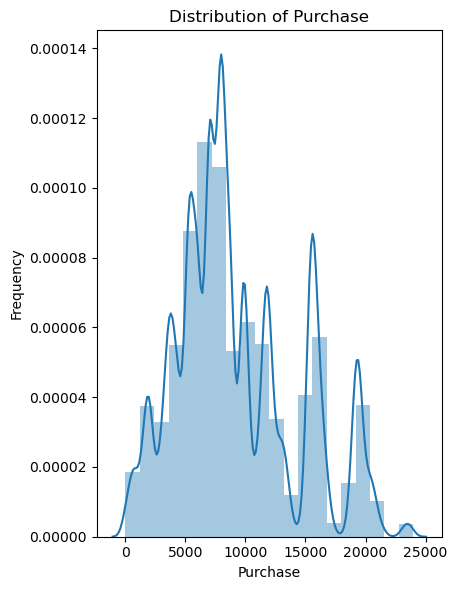

In [22]:
# Univariate Analysis for Continuous Variables
continuous_vars = ['Purchase']

for var in continuous_vars:
    plt.figure(figsize=(12, 6))
    
    # Distplot
    plt.subplot(1, 3, 1)
    sns.distplot(df[var], bins=20, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

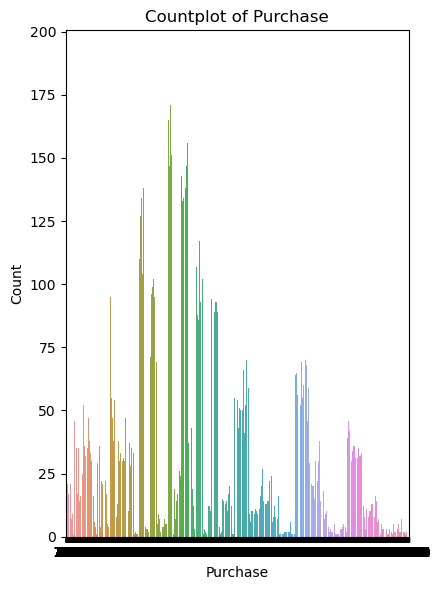

In [23]:
continuous_vars = ['Purchase']

for var in continuous_vars:
    plt.figure(figsize=(12, 6))
    
    # Countplot
    plt.subplot(1, 3, 2)
    sns.countplot(x=var, data=df)
    plt.title(f'Countplot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    

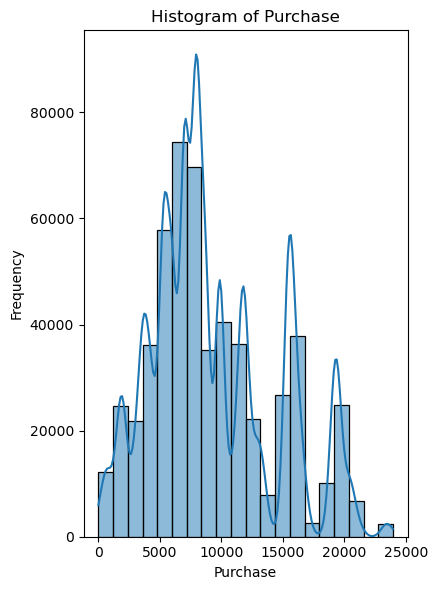

In [24]:
continuous_vars = ['Purchase']

for var in continuous_vars:
    plt.figure(figsize=(12, 6))
    
     # Histogram
    plt.subplot(1, 3, 3)
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

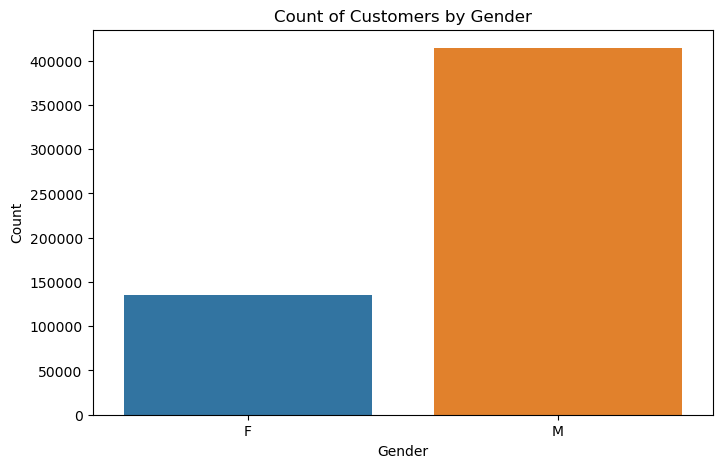

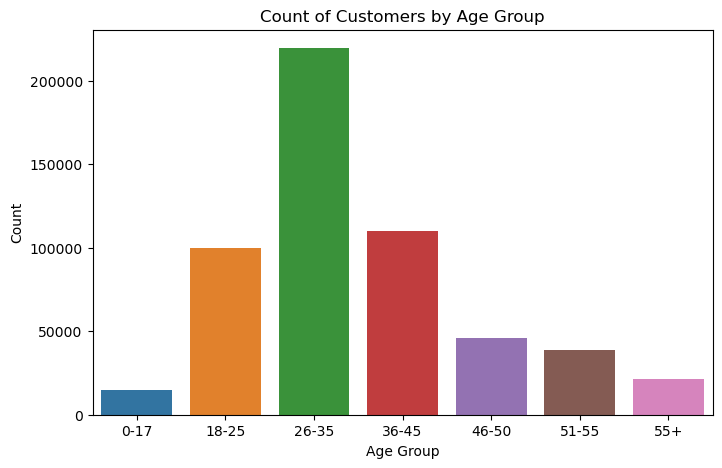

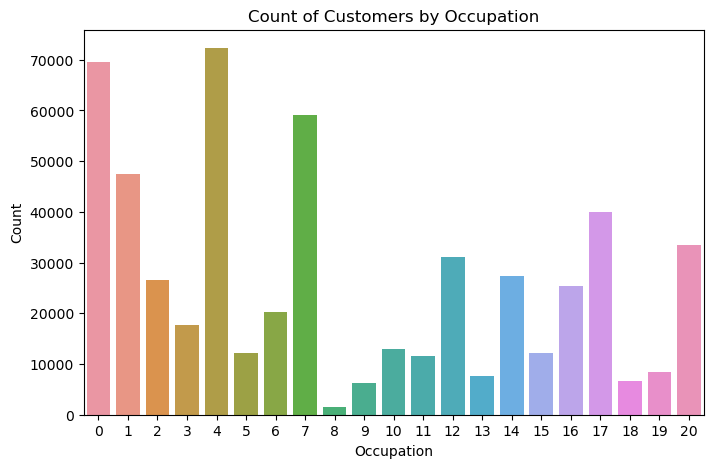

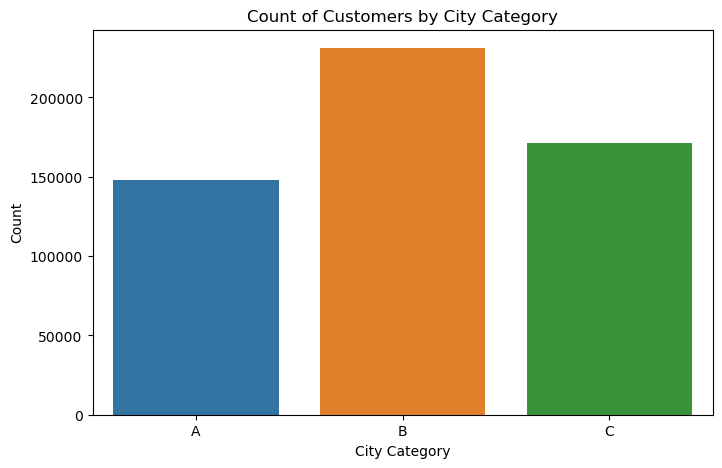

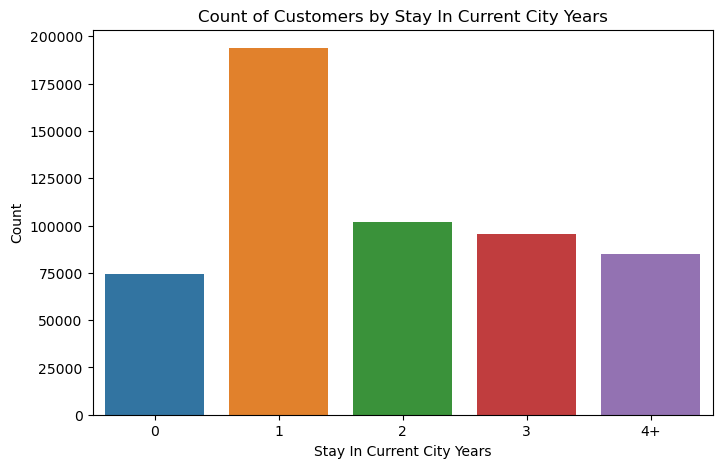

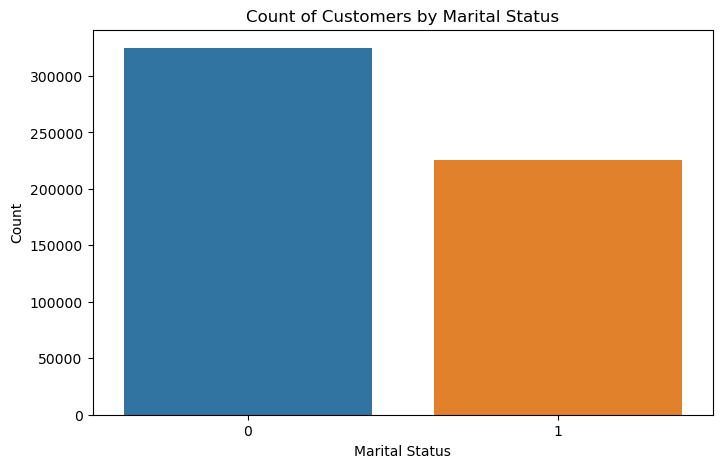

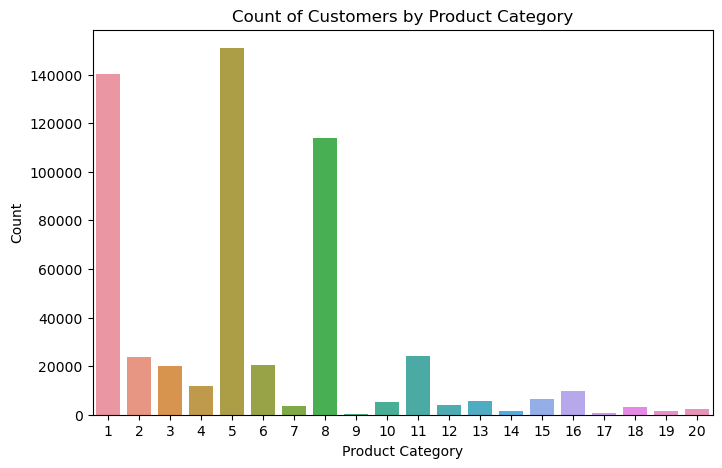

In [25]:
# Univariate Analysis for Categorical Variables
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Age', data=df)
plt.title('Count of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Occupation', data=df)
plt.title('Count of Customers by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='City_Category', data=df)
plt.title('Count of Customers by City Category')
plt.xlabel('City Category')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Stay_In_Current_City_Years', data=df)
plt.title('Count of Customers by Stay In Current City Years')
plt.xlabel('Stay In Current City Years')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Marital_Status', data=df)
plt.title('Count of Customers by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Product_Category', data=df)
plt.title('Count of Customers by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

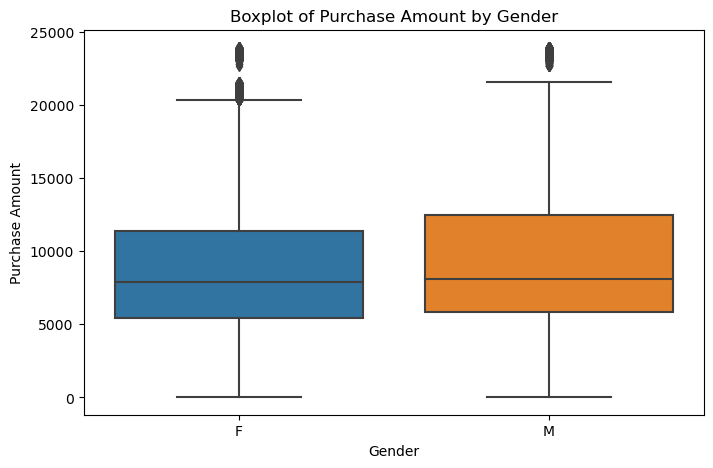

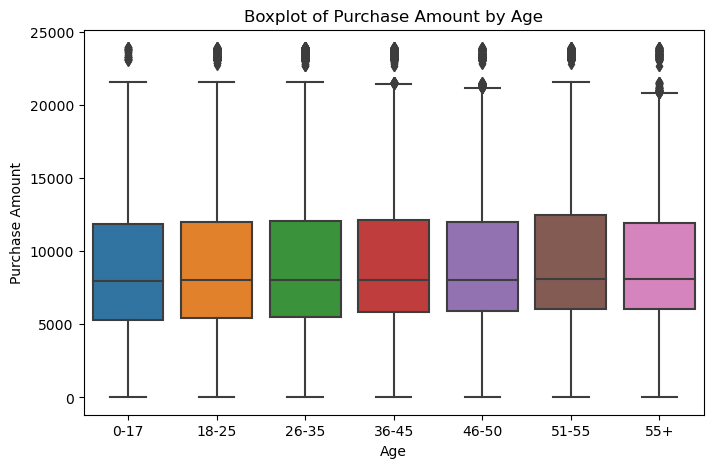

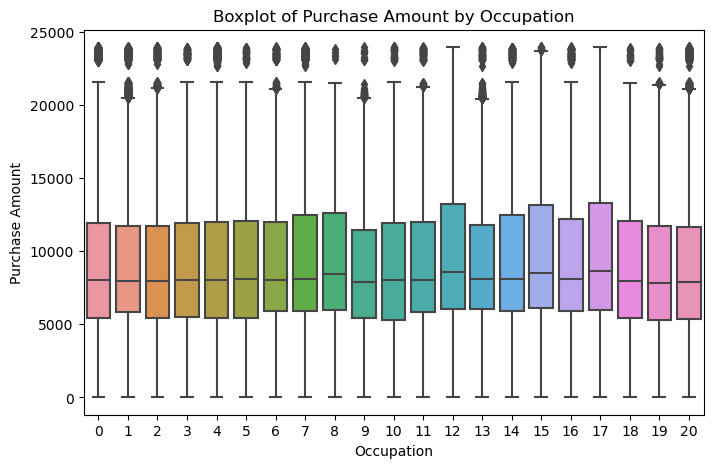

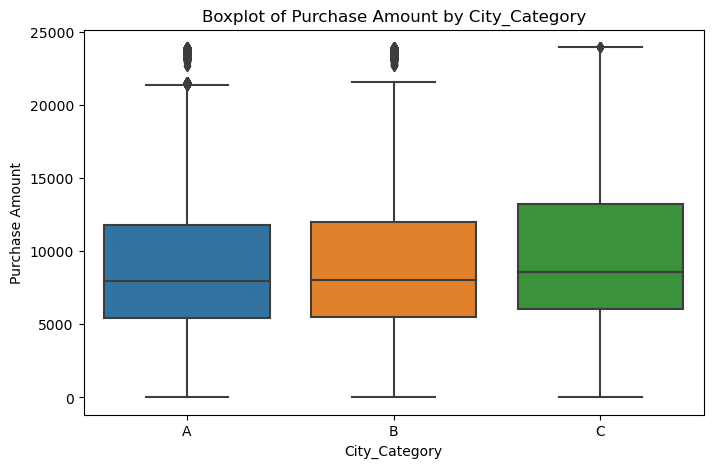

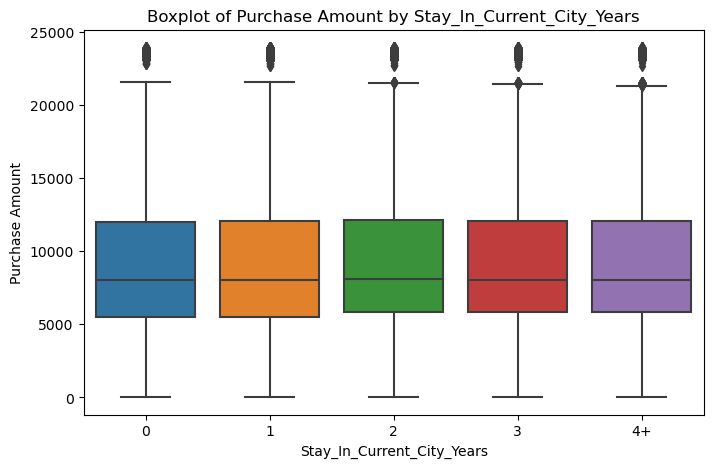

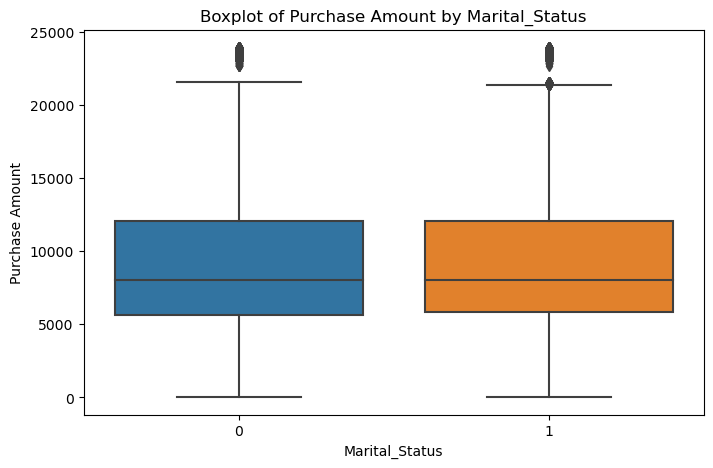

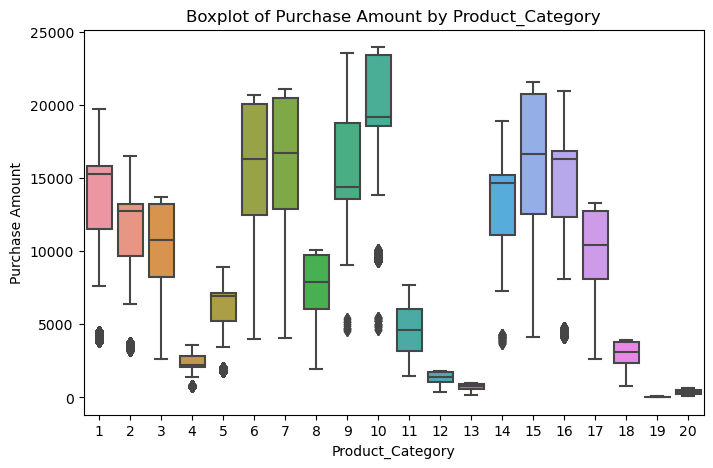

In [26]:
# Bivariate Analysis 
categorical_vars = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=var, y='Purchase', data=df)
    plt.title(f'Boxplot of Purchase Amount by {var}')
    plt.xlabel(var)
    plt.ylabel('Purchase Amount')
    plt.show()

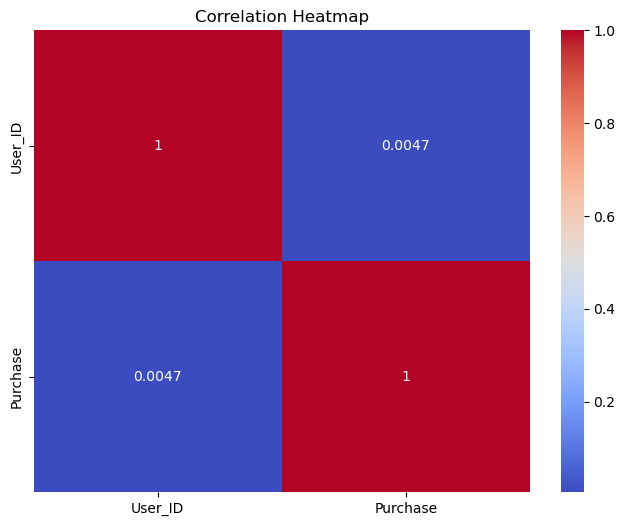

C:\Users\Minisha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


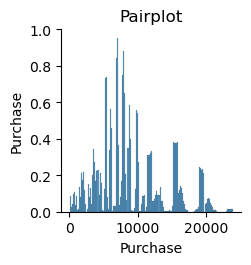

In [27]:
# Correlation
numeric_data = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(df[['Age', 'Occupation', 'Purchase']])
plt.title('Pairplot')
plt.show()

## 2. Missing Value & Outlier Detection

Missing values in the dataset:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Descriptive statistics of the dataset:
            User_ID       Purchase
count  5.500680e+05  550068.000000
mean   1.003029e+06    9263.968713
std    1.727592e+03    5023.065394
min    1.000001e+06      12.000000
25%    1.001516e+06    5823.000000
50%    1.003077e+06    8047.000000
75%    1.004478e+06   12054.000000
max    1.006040e+06   23961.000000



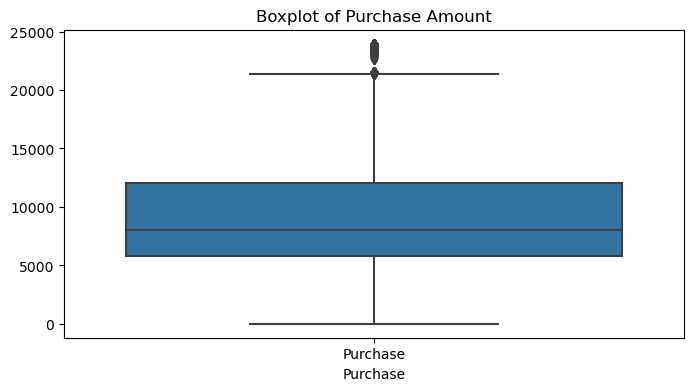

Mean of Purchase: 9263.968712959126
Median of Purchase: 8047.0
Outlier threshold: -1825.4530694386885
Number of outliers: 379178

Interquartile Range (IQR) method:
Lower bound: -3523.5
Upper bound: 21400.5
Number of outliers: 2677


Dataset after removing outliers:
            User_ID       Purchase
count  5.500680e+05  550068.000000
mean   1.003029e+06    9256.710489
std    1.727592e+03    4855.947166
min    1.000001e+06    1984.000000
25%    1.001516e+06    5823.000000
50%    1.003077e+06    8047.000000
75%    1.004478e+06   12054.000000
max    1.006040e+06   19336.000000


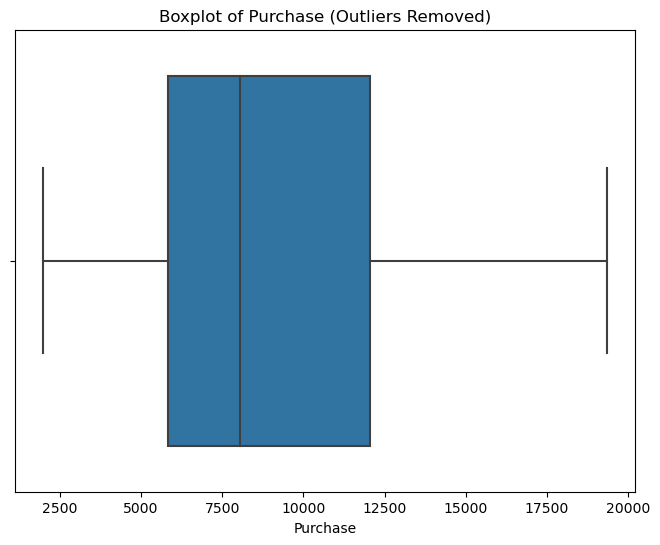

In [29]:
# Boxplot for continuous variables to detect outliers
## Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())
print()

# Descriptive statistics
print("Descriptive statistics of the dataset:")
print(df.describe())
print()

# Detect outliers using boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['Purchase']])
plt.title('Boxplot of Purchase Amount')
plt.xlabel('Purchase')
plt.show()



# Check the difference between mean and median for outlier detection
purchase_mean = df['Purchase'].mean()
purchase_median = df['Purchase'].median()
outlier_threshold = 1.5 * (purchase_median - purchase_mean)

print("Mean of Purchase:", purchase_mean)
print("Median of Purchase:", purchase_median)
print("Outlier threshold:", outlier_threshold)
print("Number of outliers:", df[df['Purchase'] > (purchase_median + outlier_threshold)].shape[0])
print()

# Additional method for outlier detection: Interquartile Range (IQR)
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Interquartile Range (IQR) method:")
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Number of outliers:", df[(df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)].shape[0])
print()

# Remove outliers by clipping data between 5th and 95th percentile
df['Purchase'] = np.clip(df['Purchase'], df['Purchase'].quantile(0.05), df['Purchase'].quantile(0.95))

# Display the dataset after removing outliers
print("\nDataset after removing outliers:")
print(df.describe())

# Boxplot to check outliers after clipping
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Purchase'])
plt.title('Boxplot of Purchase (Outliers Removed)')
plt.show()

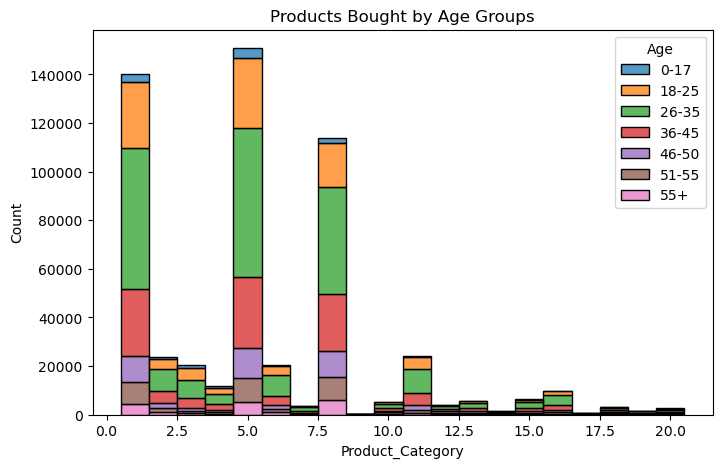

C:\Users\Minisha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


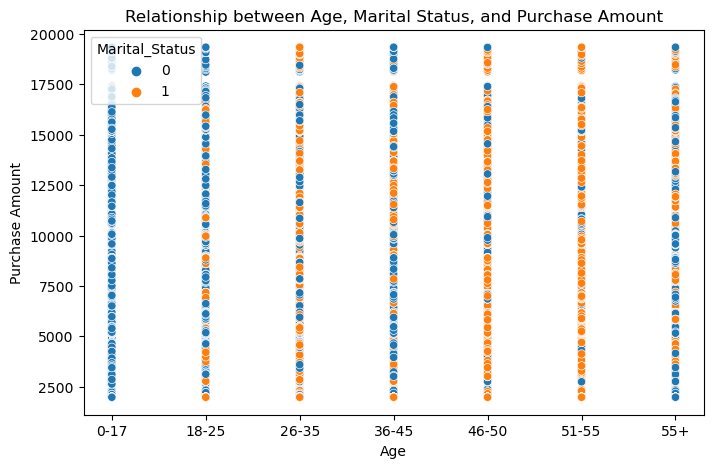

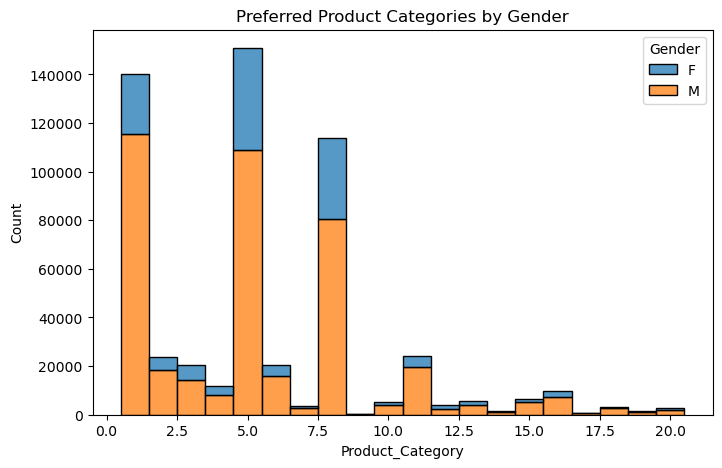

In [30]:
# Data Exploration

# Products bought by different age groups
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Product_Category', hue='Age', multiple='stack')
plt.title("Products Bought by Age Groups")
plt.show()

# b. Is there a relationship between age, marital status, and the amount spent?
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Purchase', hue='Marital_Status')
plt.title('Relationship between Age, Marital Status, and Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

# Preferred product categories for different genders
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Product_Category', hue='Gender', multiple='stack')
plt.title("Preferred Product Categories by Gender")
plt.show()

In [31]:
# Data Analysis

# Calculate average spending per transaction for male and female customers
average_male_spending = df[df['Gender'] == 'M']['Purchase'].mean()
average_female_spending = df[df['Gender'] == 'F']['Purchase'].mean()

# Calculate confidence intervals for male and female spending
male_spending_sample = df[df['Gender'] == 'M']['Purchase']
female_spending_sample = df[df['Gender'] == 'F']['Purchase']

# Confidence interval calculation function
def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    interval = stderr * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean - interval, mean + interval

male_interval = calculate_confidence_interval(male_spending_sample)
female_interval = calculate_confidence_interval(female_spending_sample)

# Results and Observations

print("Average spending per transaction:")
print("Male:", average_male_spending)
print("Female:", average_female_spending)

print("\nConfidence Intervals:")
print("Male Interval:", male_interval)
print("Female Interval:", female_interval)

print("\nAre women spending more money per transaction than men?")
if average_female_spending > average_male_spending:
    print("Yes, women are spending more money per transaction than men.")
else:
    print("No, women are not spending more money per transaction than men.")

print("\nAre confidence intervals of average male and female spending overlapping?")
if male_interval[1] >= female_interval[0] and male_interval[0] <= female_interval[1]:
    print("Yes, confidence intervals are overlapping.")
else:
    print("No, confidence intervals are not overlapping.")



Average spending per transaction:
Male: 9427.240996574606
Female: 8736.540266109021

Confidence Intervals:
Male Interval: (9412.240567188413, 9442.2414259608)
Female Interval: (8712.091286628549, 8760.989245589493)

Are women spending more money per transaction than men?
No, women are not spending more money per transaction than men.

Are confidence intervals of average male and female spending overlapping?
No, confidence intervals are not overlapping.


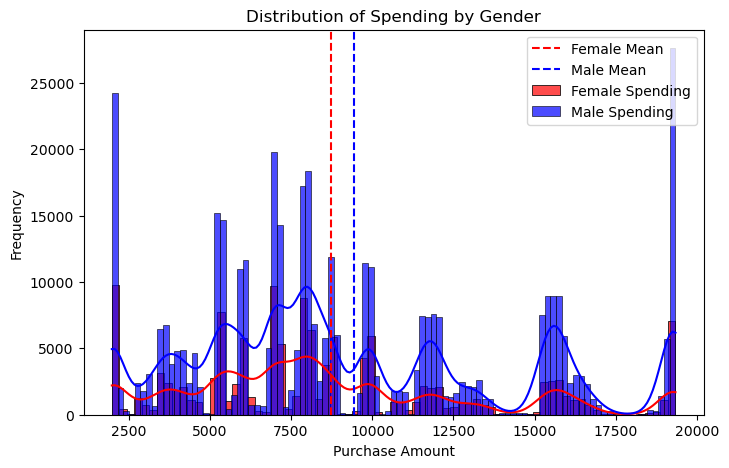


Results for Married vs Unmarried:
Married Average Spending: 9253.669823420034
Unmarried Average Spending: 9258.820463706883
Married Confidence Interval: (9233.671668620093, 9273.667978219975)
Unmarried Confidence Interval: (9242.089086233358, 9275.551841180408)
Confidence intervals for married and unmarried spending overlap.

Results for Age Groups:
Age Group: 0-17, Average Spending: 8940.64905310555, Confidence Interval: (8861.851939237624, 9019.446166973476)
Age Group: 55+, Average Spending: 9327.796549479166, Confidence Interval: (9263.909837523015, 9391.683261435317)
Age Group: 26-35, Average Spending: 9243.780119041656, Confidence Interval: (9223.472865461838, 9264.087372621474)
Age Group: 46-50, Average Spending: 9204.211483337345, Confidence Interval: (9160.33289117144, 9248.09007550325)
Age Group: 51-55, Average Spending: 9514.863250305187, Confidence Interval: (9466.181676311913, 9563.54482429846)
Age Group: 36-45, Average Spending: 9322.92190922891, Confidence Interval: (929

In [32]:
# Data Exploration

# Tracking the amount spent per transaction of all female and male customers
female_spending = df[df['Gender'] == 'F']['Purchase']
male_spending = df[df['Gender'] == 'M']['Purchase']

# Calculate average spending
average_female_spending = female_spending.mean()
average_male_spending = male_spending.mean()


# Confidence intervals and distribution of the mean of the expenses by female and male customers
plt.figure(figsize=(8, 5))
sns.histplot(data=female_spending, kde=True, color='red', label='Female Spending', alpha=0.7)
sns.histplot(data=male_spending, kde=True, color='blue', label='Male Spending', alpha=0.7)
plt.axvline(x=average_female_spending, color='red', linestyle='--', label='Female Mean')
plt.axvline(x=average_male_spending, color='blue', linestyle='--', label='Male Mean')
plt.title('Distribution of Spending by Gender')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Results when the same activity is performed for Married vs Unmarried
married_spending = df[df['Marital_Status'] == 1]['Purchase']
unmarried_spending = df[df['Marital_Status'] == 0]['Purchase']

married_mean = married_spending.mean()
unmarried_mean = unmarried_spending.mean()

# Confidence intervals
married_conf_interval = stats.norm.interval(0.95, loc=married_mean, scale=married_spending.sem())
unmarried_conf_interval = stats.norm.interval(0.95, loc=unmarried_mean, scale=unmarried_spending.sem())

print("\nResults for Married vs Unmarried:")
print("Married Average Spending:", married_mean)
print("Unmarried Average Spending:", unmarried_mean)
print("Married Confidence Interval:", married_conf_interval)
print("Unmarried Confidence Interval:", unmarried_conf_interval)

# Check if confidence intervals overlap
if married_conf_interval[1] < unmarried_conf_interval[0] or unmarried_conf_interval[1] < married_conf_interval[0]:
    print("Confidence intervals for married and unmarried spending do not overlap.")
else:
    print("Confidence intervals for married and unmarried spending overlap.")

# Results when the same activity is performed for Age
age_groups = df['Age'].unique()
age_intervals = {}

for age_group in age_groups:
    age_spending = df[df['Age'] == age_group]['Purchase']
    age_mean = age_spending.mean()
    age_conf_interval = stats.norm.interval(0.95, loc=age_mean, scale=age_spending.sem())
    age_intervals[age_group] = age_mean, age_conf_interval

print("\nResults for Age Groups:")
for age_group, (age_mean, age_conf_interval) in age_intervals.items():
    print(f"Age Group: {age_group}, Average Spending: {age_mean}, Confidence Interval: {age_conf_interval}")
    


In [33]:
#Age:

# Check for unique values in 'Age' column
print(df['Age'].unique())

# Convert 'Age' column to numeric, ignoring errors
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check for NaN values after conversion
print(df['Age'].isna().sum())

# Create bins based on life stages
bins = [0, 17, 25, 35, 50, np.inf]
labels = ['0-17', '18-25', '26-35', '36-50', '51+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate the confidence interval function
def compute_ci(data, sample_size):
    # Sample the data
    sampled_data = np.random.choice(data, size=sample_size, replace=True)
    # Calculate mean and standard deviation
    mean = np.mean(sampled_data)
    std = np.std(sampled_data, ddof=1)  # use sample standard deviation
    # Calculate standard error
    stderr = std / np.sqrt(sample_size)
    # Calculate margin of error using Z-score for 95% confidence level
    margin_of_error = 1.96 * stderr
    # Calculate confidence interval
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

# Compute confidence intervals for age groups
age_ci = {}
for age_group in labels:
    age_data = df[df['Age_Group'] == age_group]['Purchase']
    age_ci[age_group] = compute_ci(age_data, len(age_data))
    
# Check if confidence intervals overlap for different age groups
for age_group1, ci1 in age_ci.items():
    for age_group2, ci2 in age_ci.items():
        if age_group1 != age_group2:
            if ci1[1] < ci2[0] or ci2[1] < ci1[0]:
                print(f"Confidence intervals for age groups {age_group1} and {age_group2} do not overlap.")
            else:
                print(f"Confidence intervals for age groups {age_group1} and {age_group2} overlap.")


['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
550068
Confidence intervals for age groups 0-17 and 18-25 overlap.
Confidence intervals for age groups 0-17 and 26-35 overlap.
Confidence intervals for age groups 0-17 and 36-50 overlap.
Confidence intervals for age groups 0-17 and 51+ overlap.
Confidence intervals for age groups 18-25 and 0-17 overlap.
Confidence intervals for age groups 18-25 and 26-35 overlap.
Confidence intervals for age groups 18-25 and 36-50 overlap.
Confidence intervals for age groups 18-25 and 51+ overlap.
Confidence intervals for age groups 26-35 and 0-17 overlap.
Confidence intervals for age groups 26-35 and 18-25 overlap.
Confidence intervals for age groups 26-35 and 36-50 overlap.
Confidence intervals for age groups 26-35 and 51+ overlap.
Confidence intervals for age groups 36-50 and 0-17 overlap.
Confidence intervals for age groups 36-50 and 18-25 overlap.
Confid

C:\Users\Minisha\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Minisha\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Minisha\anaconda3\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Minisha\anaconda3\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Minisha\anaconda3\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [34]:
female_spending = df[df['Gender'] == 'F']['Purchase']
male_spending = df[df['Gender'] == 'M']['Purchase']

# Calculate the confidence interval function
def compute_ci(data, sample_size):
    # Sample the data
    sampled_data = np.random.choice(data, size=sample_size, replace=True)
    # Calculate mean and standard deviation
    mean = np.mean(sampled_data)
    std = np.std(sampled_data, ddof=1)  # use sample standard deviation
    # Calculate standard error
    stderr = std / np.sqrt(sample_size)
    # Calculate margin of error using Z-score for 95% confidence level
    margin_of_error = 1.96 * stderr
    # Calculate confidence interval
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

# Compute confidence intervals for different sample sizes
sample_sizes = [len(female_spending), 300, 3000, 30000]
confidence_intervals_female = {}
confidence_intervals_male = {}

for size in sample_sizes:
    ci_female = compute_ci(female_spending, size)
    ci_male = compute_ci(male_spending, size)
    confidence_intervals_female[size] = ci_female
    confidence_intervals_male[size] = ci_male

# Print confidence intervals
print("Confidence Intervals for Female Spending:")
for size, ci in confidence_intervals_female.items():
    print(f"Sample Size: {size}, CI: {ci}")

print("\nConfidence Intervals for Male Spending:")
for size, ci in confidence_intervals_male.items():
    print(f"Sample Size: {size}, CI: {ci}")

Confidence Intervals for Female Spending:
Sample Size: 135809, CI: (8710.331989565335, 8759.254017253066)
Sample Size: 300, CI: (8547.977608592993, 9635.149058073674)
Sample Size: 3000, CI: (8631.531696469667, 8962.726970197002)
Sample Size: 30000, CI: (8712.15061771257, 8816.567915620763)

Confidence Intervals for Male Spending:
Sample Size: 135809, CI: (9407.80825985151, 9460.179664365587)
Sample Size: 300, CI: (9559.450345874817, 10668.802987458517)
Sample Size: 3000, CI: (9193.082390992022, 9546.187609007979)
Sample Size: 30000, CI: (9397.144760631996, 9508.770772701337)


In [35]:
married_spending = df[df['Marital_Status'] == 1]['Purchase']
unmarried_spending = df[df['Marital_Status'] == 0]['Purchase']

# Calculate the confidence interval function
def compute_ci(data, sample_size):
    # Sample the data
    sampled_data = np.random.choice(data, size=sample_size, replace=True)
    # Calculate mean and standard deviation
    mean = np.mean(sampled_data)
    std = np.std(sampled_data, ddof=1)  # use sample standard deviation
    # Calculate standard error
    stderr = std / np.sqrt(sample_size)
    # Calculate margin of error using Z-score for 95% confidence level
    margin_of_error = 1.96 * stderr
    # Calculate confidence interval
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

# Compute confidence intervals for different sample sizes
sample_sizes = [len(married_spending), 300, 3000, 30000]
confidence_intervals_married = {}
confidence_intervals_unmarried = {}

for size in sample_sizes:
    ci_married = compute_ci(married_spending, size)
    ci_unmarried = compute_ci(unmarried_spending, size)
    confidence_intervals_married[size] = ci_married
    confidence_intervals_unmarried[size] = ci_unmarried

# Print confidence intervals
print("Confidence Intervals for Married Spending:")
for size, ci in confidence_intervals_married.items():
    print(f"Sample Size: {size}, CI: {ci}")

print("\nConfidence Intervals for Unmarried Spending:")
for size, ci in confidence_intervals_unmarried.items():
    print(f"Sample Size: {size}, CI: {ci}")


Confidence Intervals for Married Spending:
Sample Size: 225337, CI: (9223.93916256521, 9263.947389576693)
Sample Size: 300, CI: (9188.938521305487, 10301.32814536118)
Sample Size: 3000, CI: (9041.264792675569, 9388.008540657765)
Sample Size: 30000, CI: (9200.753676553213, 9310.47865678012)

Confidence Intervals for Unmarried Spending:
Sample Size: 225337, CI: (9242.479871236603, 9282.719416940661)
Sample Size: 300, CI: (8765.139322035146, 9811.480677964853)
Sample Size: 3000, CI: (9254.70015125194, 9602.897848748062)
Sample Size: 30000, CI: (9222.281667779305, 9332.079532220694)
